# Data Storytelling: 
## Adult Income Data

> Author: **Chloe Jung** <br>

## Table of Contents

The data was obtained from [Kaggle](https://www.kaggle.com/wenruliu/adult-income-dataset).

* [1. Import the Packages](#1)
* [2. Objectives](#2)
* [3. Load the Data](#3)
* [4. Explore the Data](#4)
* [5. Correlation](#5)

# 1. Import the Packages <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
import matplotlib.dates as mdates
from matplotlib import gridspec

## 2. Objectives <a class="anchor" id="2"></a>
- Audience: Non-technical
- Based on the EDA, will provide the narrative of the dataset

#### Questions to think about:
● Can I count something interesting? 
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)? 
● Can I make a bar plot or a histogram? 
● Can I compare two related quantities? 
● Can I make a scatterplot? 
● Can I make a time-series plot? 
● Looking at the plots, what are some insights I can make? 
● Can I see any correlations? 
● Is there a hypothesis I can - and should - investigate further? 
● What other questions are the insights leading me to ask? 


## 3. Load Data <a class="anchor" id="3"></a>

In [2]:
data = pd.read_csv("adult.csv")

## 4. Explore the Data <a class="anchor" id="4"></a>

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
    - the sampling weight corresponding to the observations
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#add an index column
data['idx'] = range(1, len(data) + 1)

In [6]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,idx
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,2
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,3
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,4
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,5


### Missing Values

In [7]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


### Basic Statistics

In [8]:
int_col = data.dtypes[data.dtypes == 'int64'].index | data.dtypes[data.dtypes == 'float64'].index
int_col

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [9]:
obj_col = data.dtypes[data.dtypes == 'object'].index
obj_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [10]:
data[int_col].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


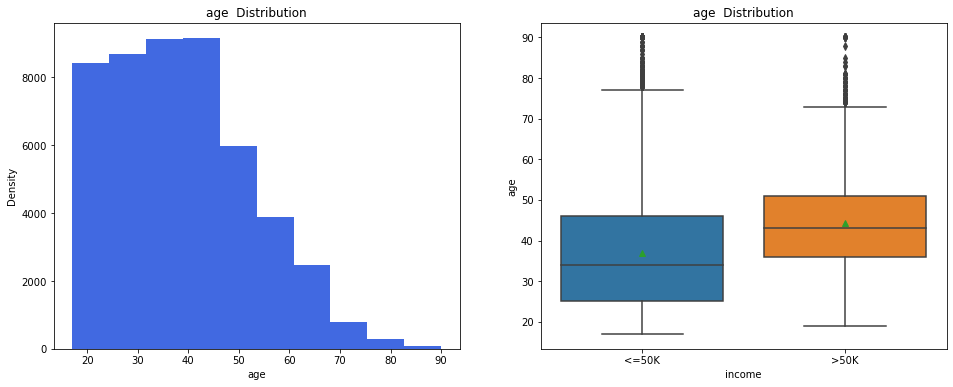

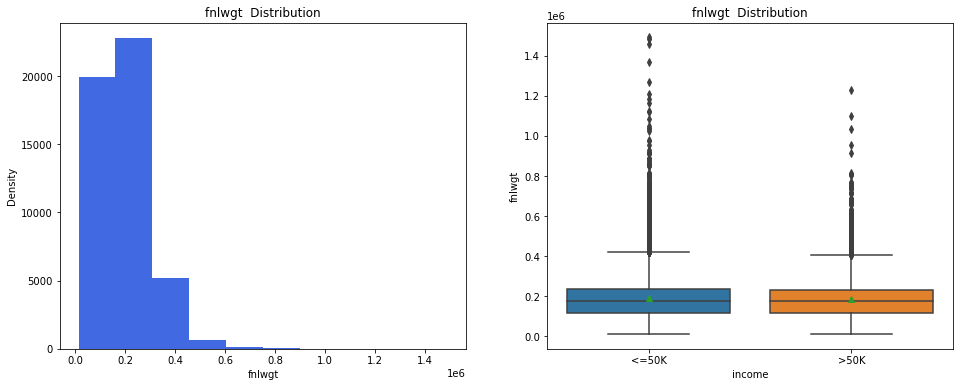

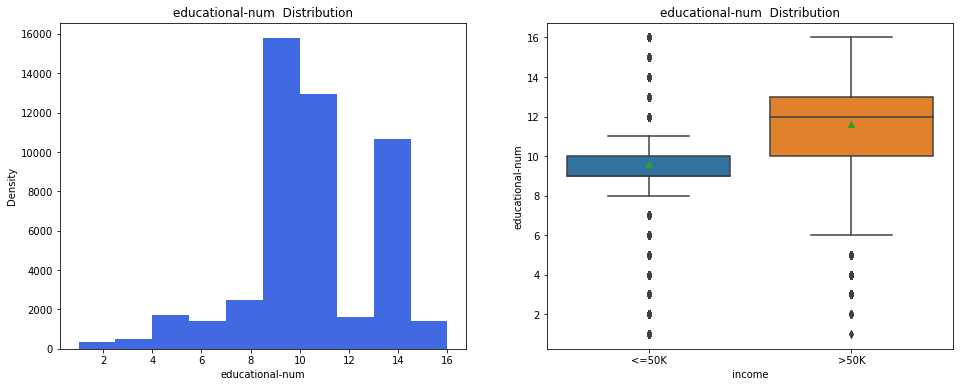

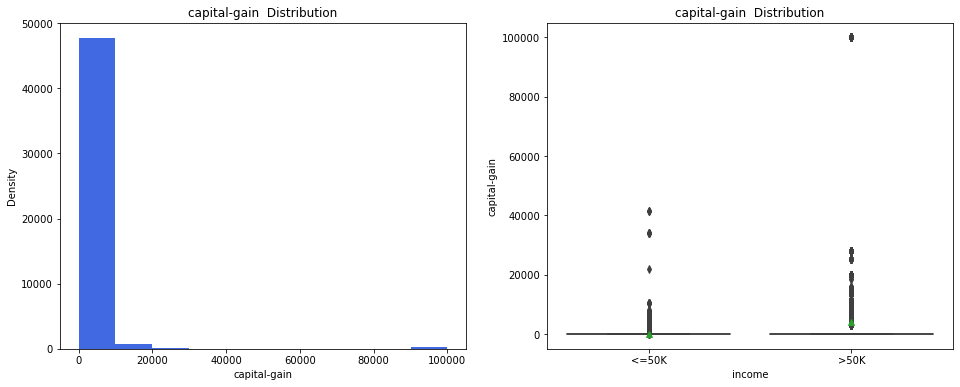

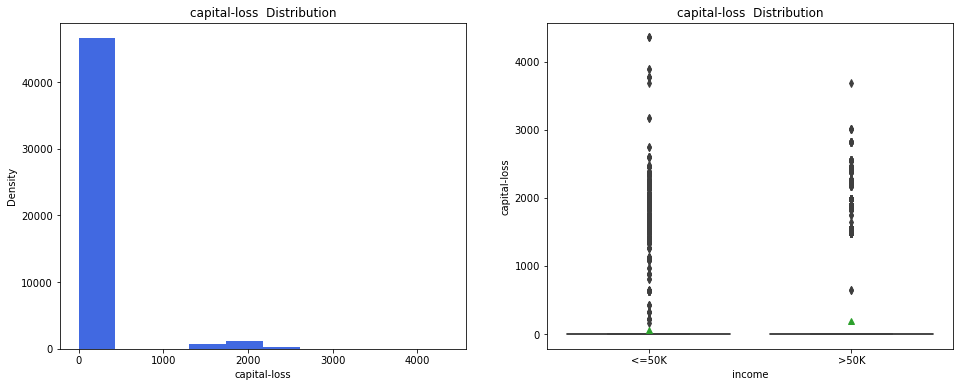

In [11]:
for column in int_col[:-1]:
    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.hist(data[column],color='#4169e1')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column}  Distribution')

    plt.subplot(1,2,2)
    sns.boxplot(x='income', y=column, data =data, showmeans=True )
    plt.xlabel('income')
    plt.ylabel(column)
    plt.title(f'{column}  Distribution')

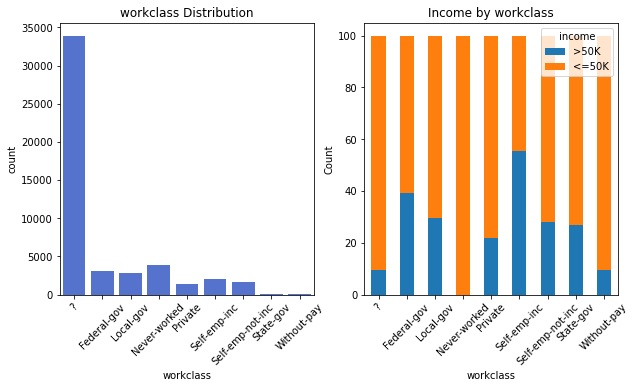

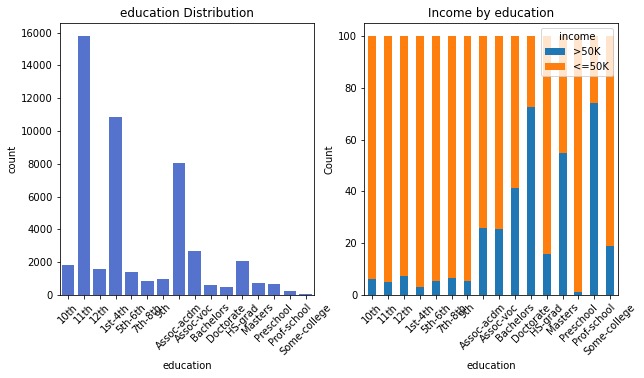

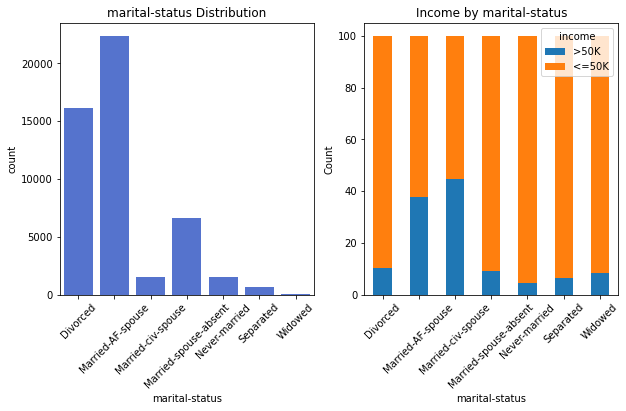

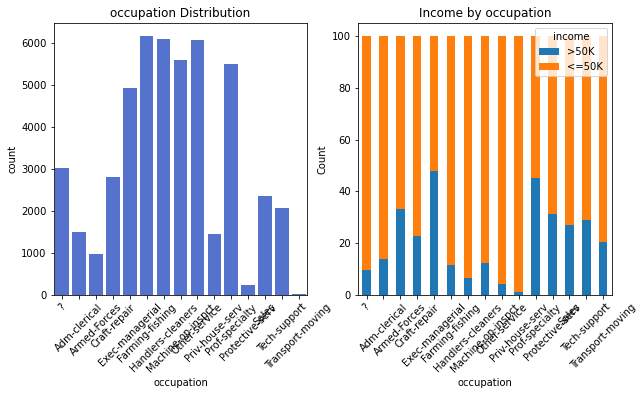

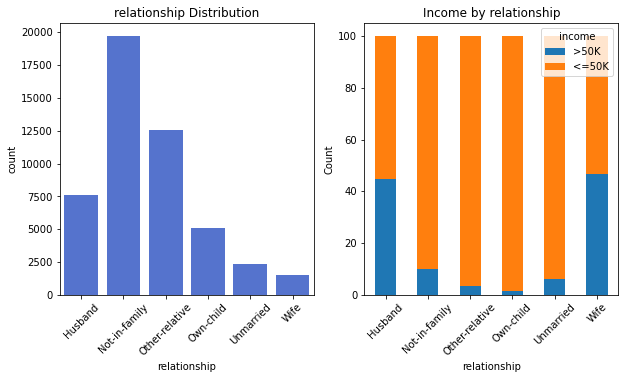

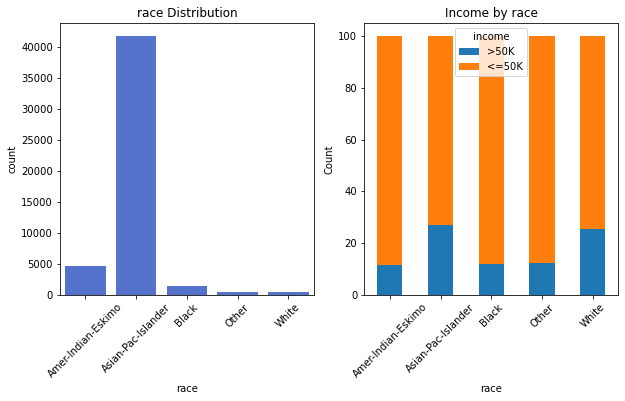

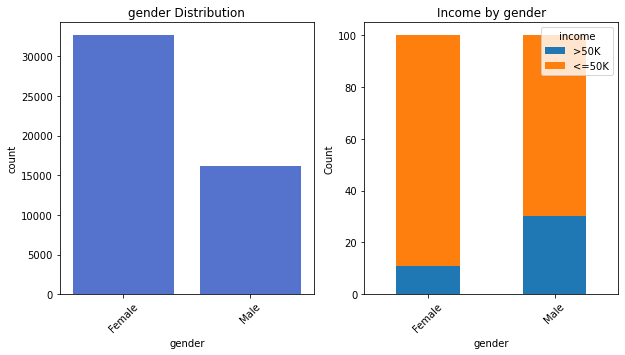

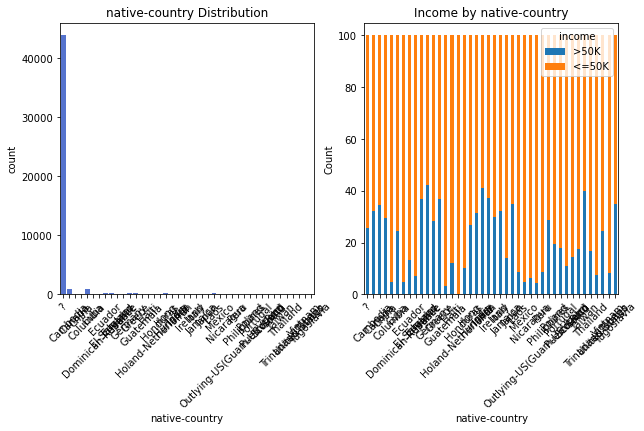

In [12]:
for column in obj_col[:-1]:
    pivot = pd.pivot_table(data, columns='income', index=column, aggfunc='count', values='idx')
    piv = pivot.fillna(0)
    piv['total']=piv['<=50K']+piv['>50K']
    piv['<=50K'] = piv['<=50K']/piv['total']*100
    piv['>50K'] = piv['>50K']/piv['total']*100
    piv.drop(['total'],axis=1,inplace=True)
    piv = piv[[">50K","<=50K"]] 
    
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
    
    axes[0].set_title(f'{column} Distribution')
    _=sns.countplot(data[column],ax=axes[0],color='#4169e1')
    plt.xlabel(column)
    plt.ylabel('Count')
    _.set_xticklabels(_.get_xticklabels(),rotation=45)
    
    axes[1].set_title(f'Income by {column}')
    _=piv.plot(kind='bar', stacked=True, ax=axes[1])
    _.set_xticklabels(_.get_xticklabels(),rotation=45)
   

### 4-1) Target Variable - Income
- In this dataset, there were more people with income less than or equal to 50K (76.1%) than people with income more than 50K (23.9%). 

In [13]:
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

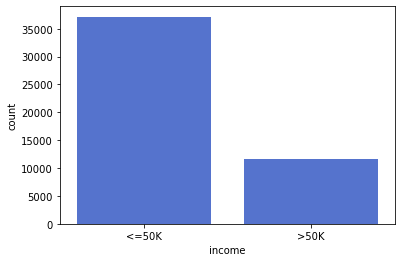

In [14]:
sns.countplot(x="income",data=data, color = "#4169E1");
#plt.savefig('image/1_income_countplot.png',bbox_inches = 'tight')

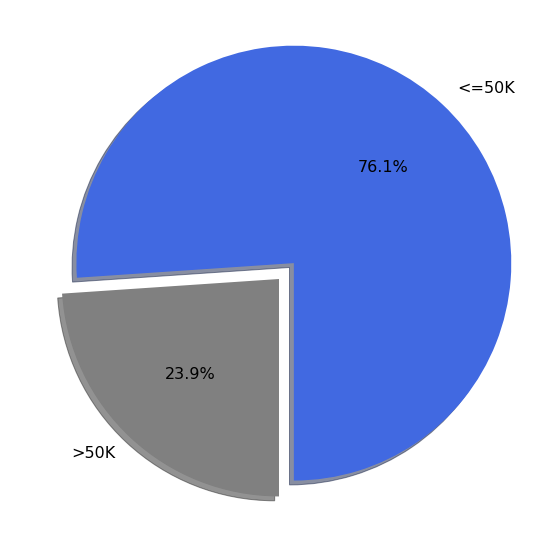

In [15]:
labels =data['income'].value_counts(sort = True).index
sizes = data['income'].value_counts(sort = True)
colors = ["#4169E1","#808080"]
explode = (0.1,0)  # explode 1st slice
rcParams['figure.figsize'] = 10,10
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,textprops={'fontsize': 16})
plt.show()

### 4-2) Age

- The average age of people with income higher than 50K (44.28 years old) is greater that that of people with income lower or equal to 50K (36.87 years old).
- Older people tend to make more money.

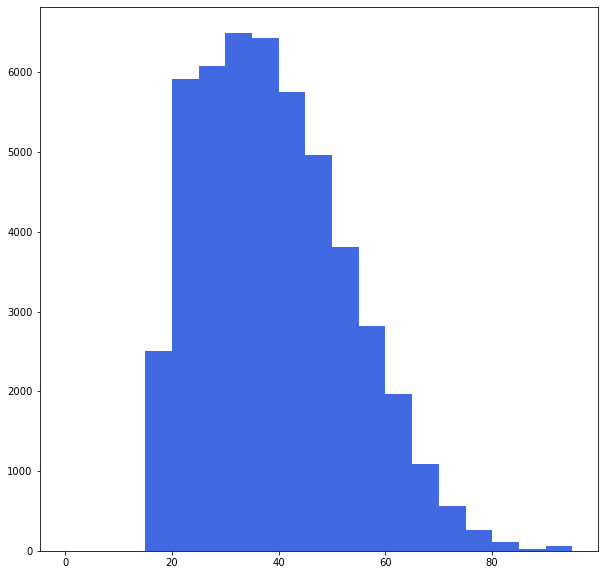

In [16]:
plt.hist(data.age, color="#4169E1", bins=np.arange(0,100,5));

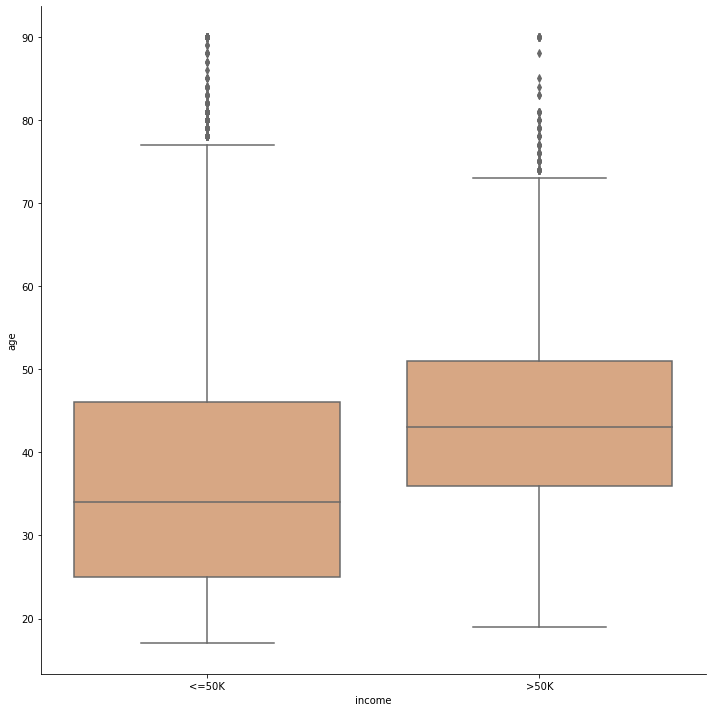

In [17]:
sns.catplot(x="income",y="age",data=data,  kind="box", height = 10, color="#e5a576")

In [18]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


### 4-3) workclass
- In this data set, there were most people who work in private sector. 
- Almost 54% of the people in the data set worked in a private sector and make more than 50K.
- Within each work class, the self-employed people show the greatest proportion of making more than 50K.

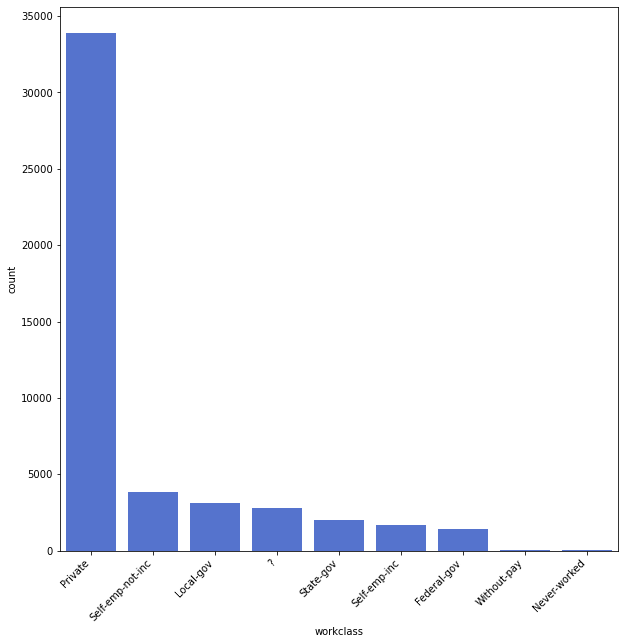

In [19]:
_=sns.countplot(x="workclass",data=data, color = "#4169E1", order = data['workclass'].value_counts().index);
_.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

posx and posy should be finite values
posx and posy should be finite values


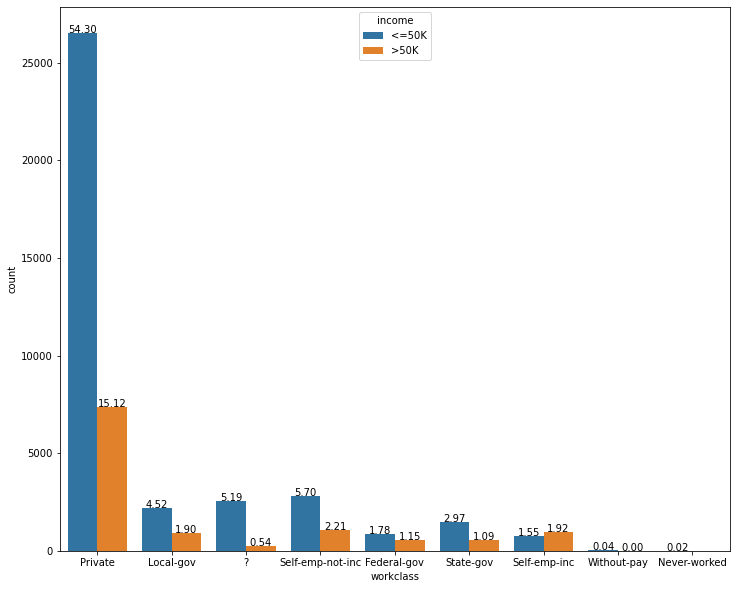

In [20]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

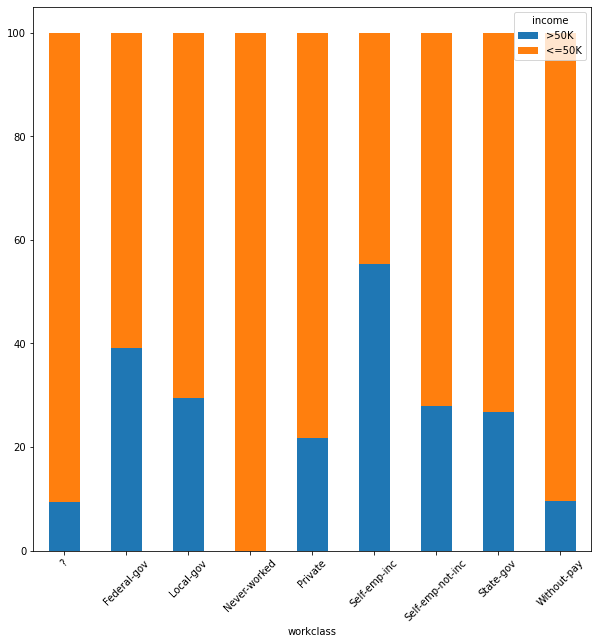

In [21]:
pivot = pd.pivot_table(data, columns='income', index='workclass', aggfunc='count', values='idx')
piv = pivot.fillna(0)
piv['total']=piv['<=50K']+piv['>50K']
piv['<=50K'] = piv['<=50K']/piv['total']*100
piv['>50K'] = piv['>50K']/piv['total']*100
piv.drop(['total'],axis=1,inplace=True)
piv = piv[[">50K","<=50K"]] 
_=piv.plot(kind='bar', stacked=True)
_.set_xticklabels(_.get_xticklabels(),rotation=45)
plt.show()

### 4-4) education
- In this data set, there were most people who are Highschool graduates, followed by some college and Bachelors degree.
- Almost 27% of the people in the data set have some college education, and make more than 50K.
- Within each education level, the people who went to professional school followed by people with doctorate degree show the greatest proportion of making more than 50K.

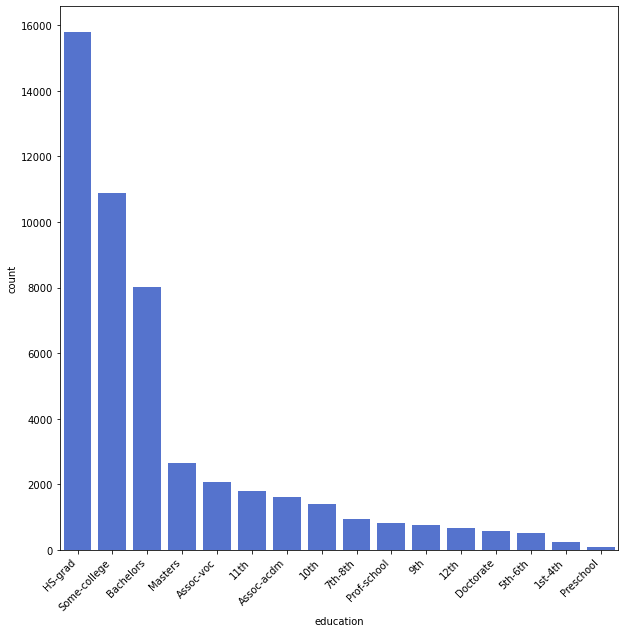

In [22]:
_=sns.countplot(x="education",data=data, color = "#4169E1", order = data['education'].value_counts().index);
_.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

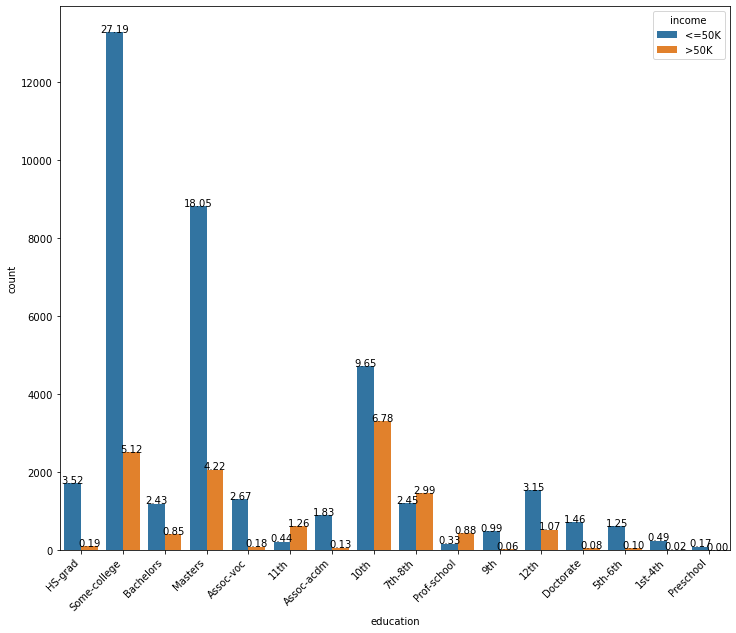

In [23]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="education", hue="income", data=data)
ax.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

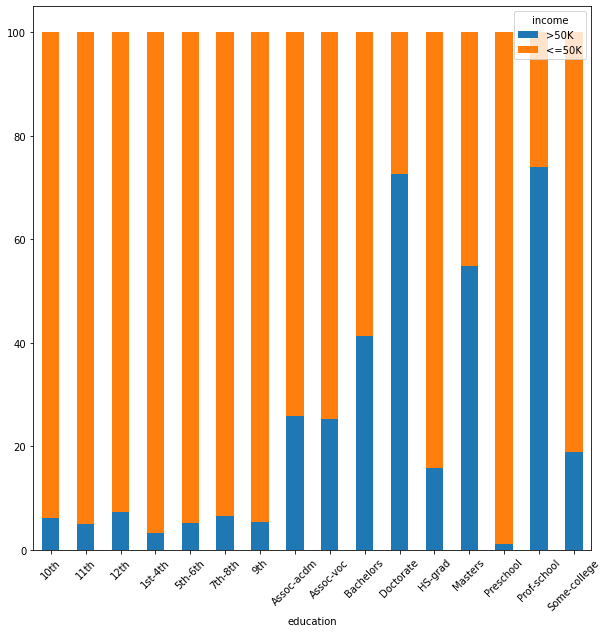

In [24]:
pivot = pd.pivot_table(data, columns='income', index='education', aggfunc='count', values='idx')
piv = pivot.fillna(0)
piv['total']=piv['<=50K']+piv['>50K']
piv['<=50K'] = piv['<=50K']/piv['total']*100
piv['>50K'] = piv['>50K']/piv['total']*100
piv.drop(['total'],axis=1,inplace=True)
piv = piv[[">50K","<=50K"]] 
_=piv.plot(kind='bar', stacked=True)
_.set_xticklabels(_.get_xticklabels(),rotation=45)
plt.show()

### 4-5) educational-num
- The average years of education people with income higher than 50K recieved (11.6 years) is greater that that of people with income lower or equal to 50K (9.6 years).

In [25]:
data['educational-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64

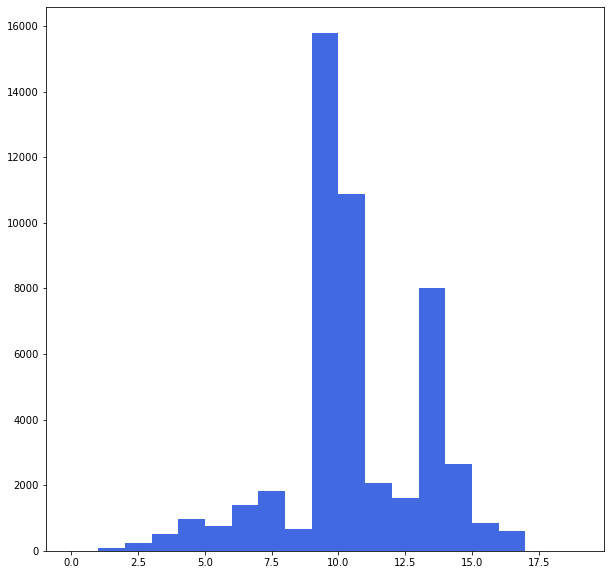

In [26]:
plt.hist(data['educational-num'], color="#4169E1", bins=np.arange(0,20,1));

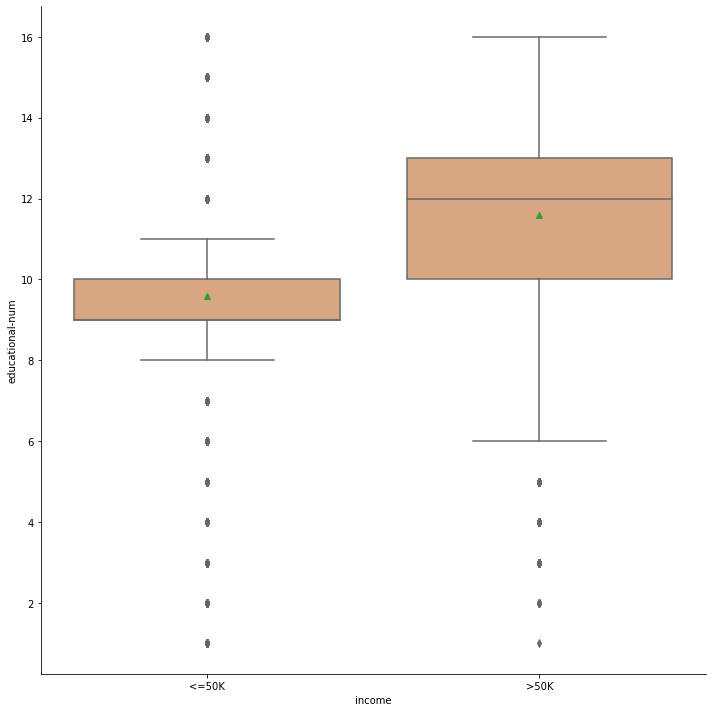

In [27]:
sns.catplot(x="income",y="educational-num",data=data,  kind="box", height = 10, color="#e5a576", showmeans=True)

In [28]:
data[['income', 'educational-num']].groupby(['income'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,income,educational-num
1,>50K,11.602807
0,<=50K,9.598493


### 4-6) marital-status
- In this data set, most people were married-civ-spouse, followed by never married and divorced.
- Almost 31.5% of the people in the data set are never married, and make more than 50K.
- Within each marital status, married-civ-spouse show the greatest proportion of making more than 50K.

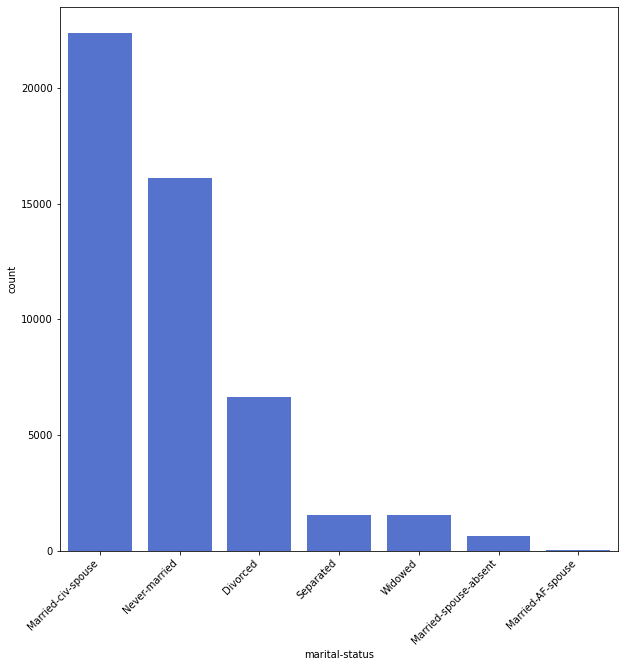

In [29]:
_=sns.countplot(x="marital-status",data=data, color = "#4169E1", order = data['marital-status'].value_counts().index);
_.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

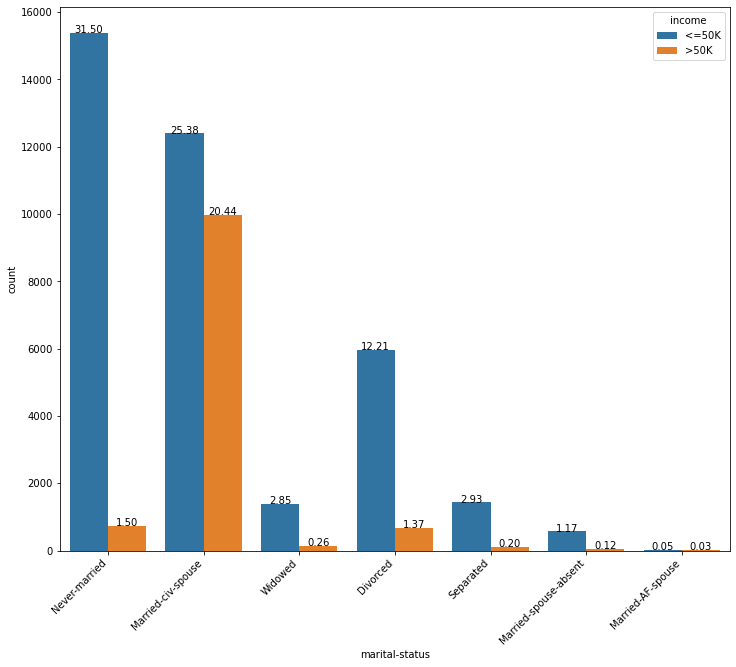

In [30]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="marital-status", hue="income", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

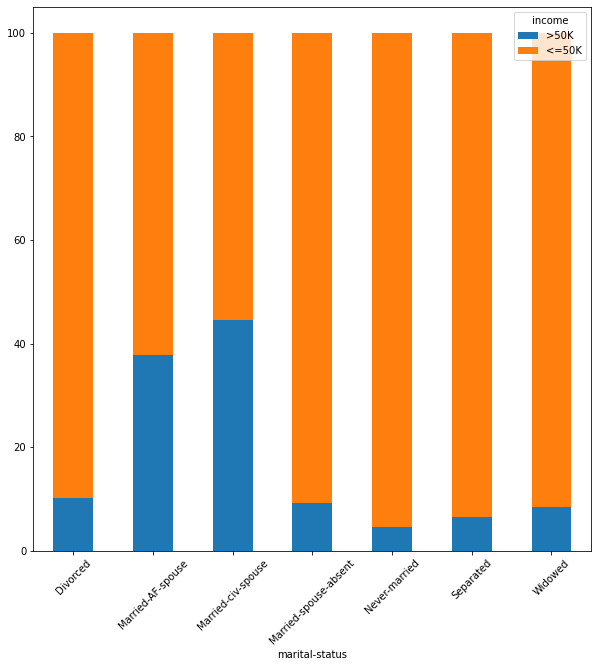

In [31]:
pivot = pd.pivot_table(data, columns='income', index='marital-status', aggfunc='count', values='idx')
piv = pivot.fillna(0)
piv['total']=piv['<=50K']+piv['>50K']
piv['<=50K'] = piv['<=50K']/piv['total']*100
piv['>50K'] = piv['>50K']/piv['total']*100
piv.drop(['total'],axis=1,inplace=True)
piv = piv[[">50K","<=50K"]] 
_=piv.plot(kind='bar', stacked=True)
_.set_xticklabels(_.get_xticklabels(),rotation=45)
plt.show()

### 4-7) relationship
- In this data set, most people were husbands, followed not in family and own child.
- Almost 23.15% of the people in the data set are not in the family, and make more than 50K, and this is similar in case for husbands.
- Within each relationship, wife and husband show the greatest proportion of making more than 50K.

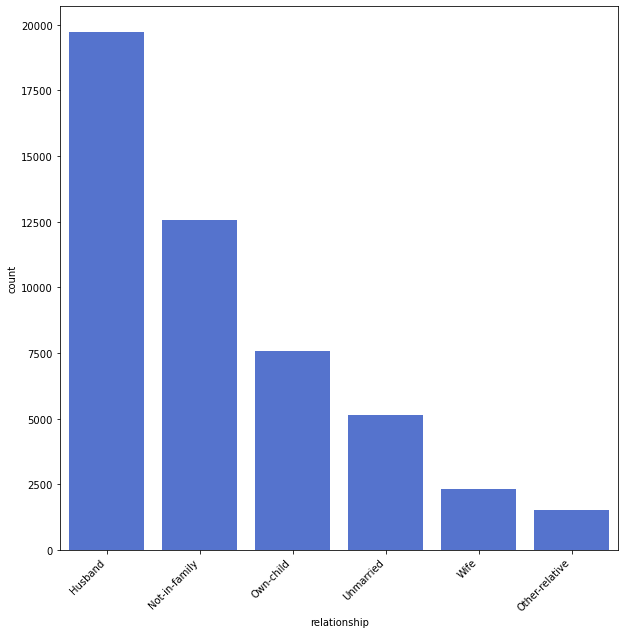

In [32]:
_=sns.countplot(x="relationship",data=data, color = "#4169E1", order = data['relationship'].value_counts().index);
_.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

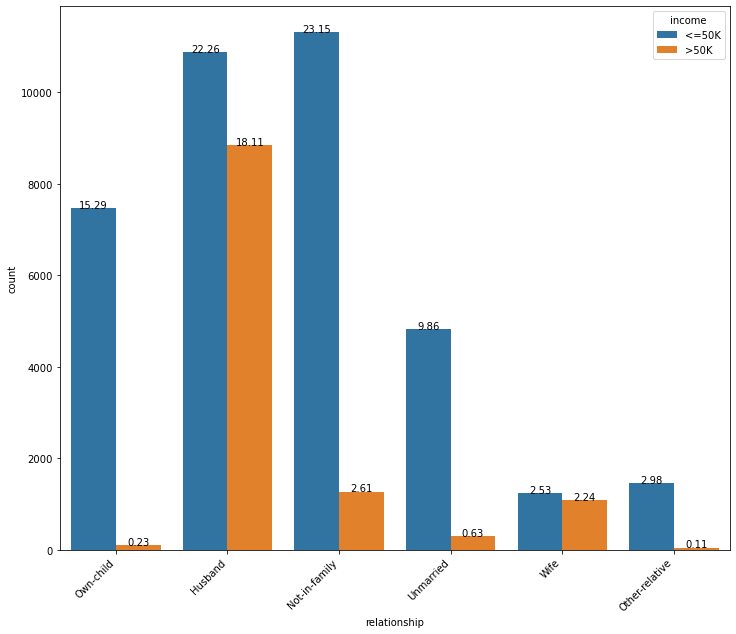

In [33]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="relationship", hue="income", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

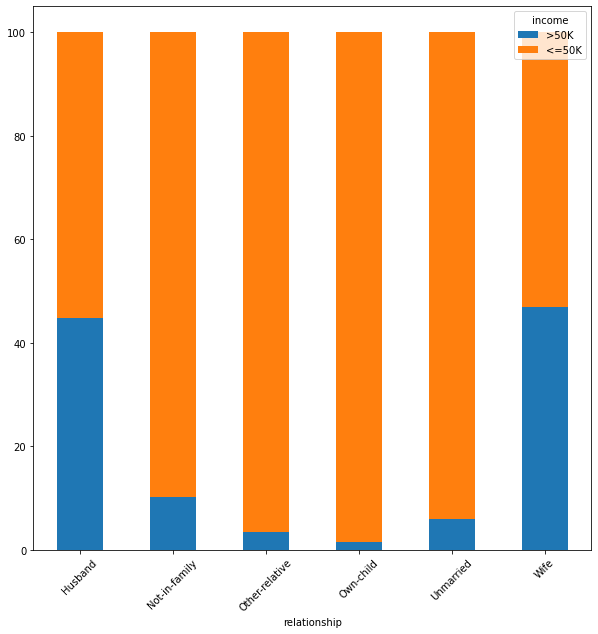

In [34]:
pivot = pd.pivot_table(data, columns='income', index='relationship', aggfunc='count', values='idx')
piv = pivot.fillna(0)
piv['total']=piv['<=50K']+piv['>50K']
piv['<=50K'] = piv['<=50K']/piv['total']*100
piv['>50K'] = piv['>50K']/piv['total']*100
piv.drop(['total'],axis=1,inplace=True)
piv = piv[[">50K","<=50K"]] 
_=piv.plot(kind='bar', stacked=True)
_.set_xticklabels(_.get_xticklabels(),rotation=45)
plt.show()

### 4-8) race
- In this data set, most people were white, followed by black.
- Almost 63.79% of the people in the data set are white, and make more than 50K.
- Within each race, Asian Pacific Islander and White show the greatest proportion of making more than 50K.

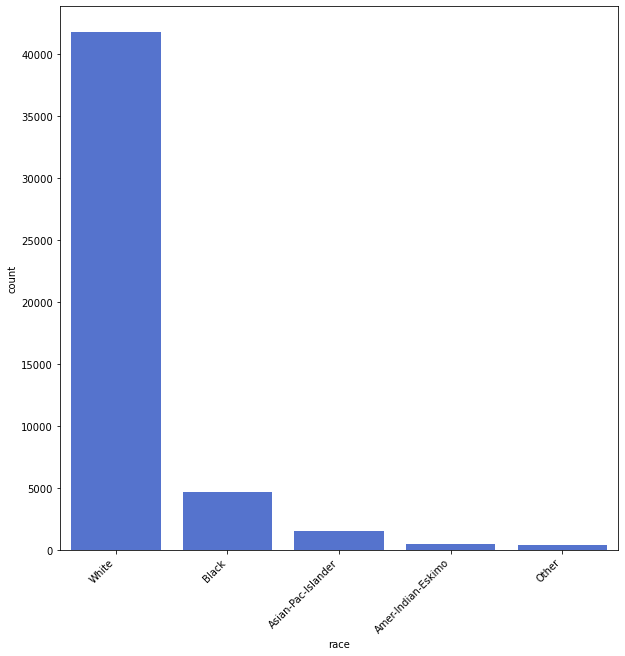

In [35]:
_=sns.countplot(x="race",data=data, color = "#4169E1", order = data['race'].value_counts().index);
_.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

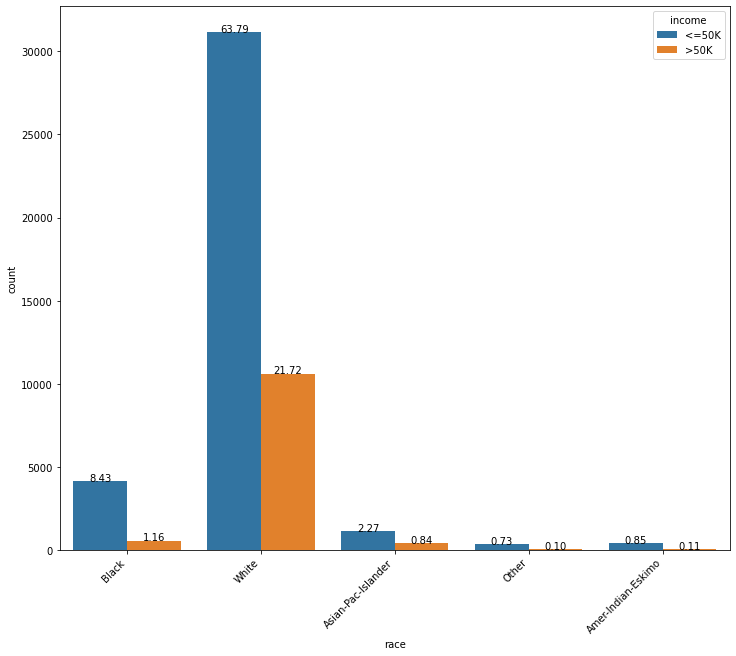

In [36]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="race", hue="income", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

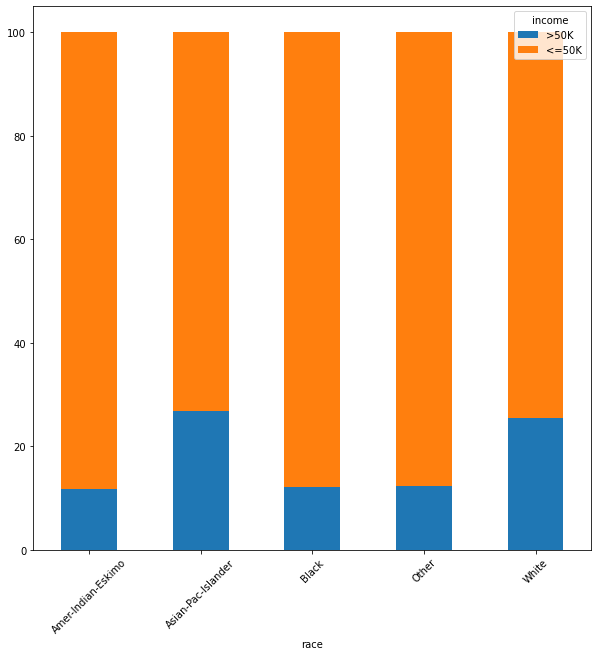

In [37]:
pivot = pd.pivot_table(data, columns='income', index='race', aggfunc='count', values='idx')
piv = pivot.fillna(0)
piv['total']=piv['<=50K']+piv['>50K']
piv['<=50K'] = piv['<=50K']/piv['total']*100
piv['>50K'] = piv['>50K']/piv['total']*100
piv.drop(['total'],axis=1,inplace=True)
piv = piv[[">50K","<=50K"]] 
_=piv.plot(kind='bar', stacked=True)
_.set_xticklabels(_.get_xticklabels(),rotation=45)
plt.show()

### 4-9) gender
- In this data set, there were more males than females.
- Almost 46.54% of the people in the data set are male, and make more than 50K.
- Within gender, higher proportions of male make more than 50K.

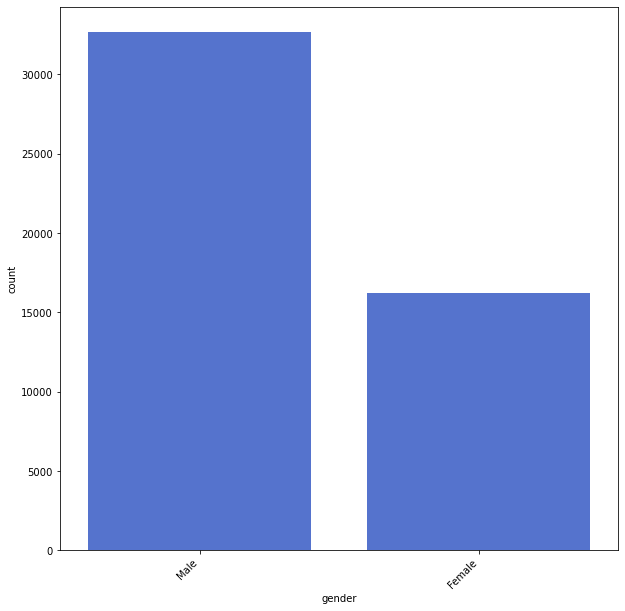

In [38]:
_=sns.countplot(x="gender",data=data, color = "#4169E1", order = data['gender'].value_counts().index);
_.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

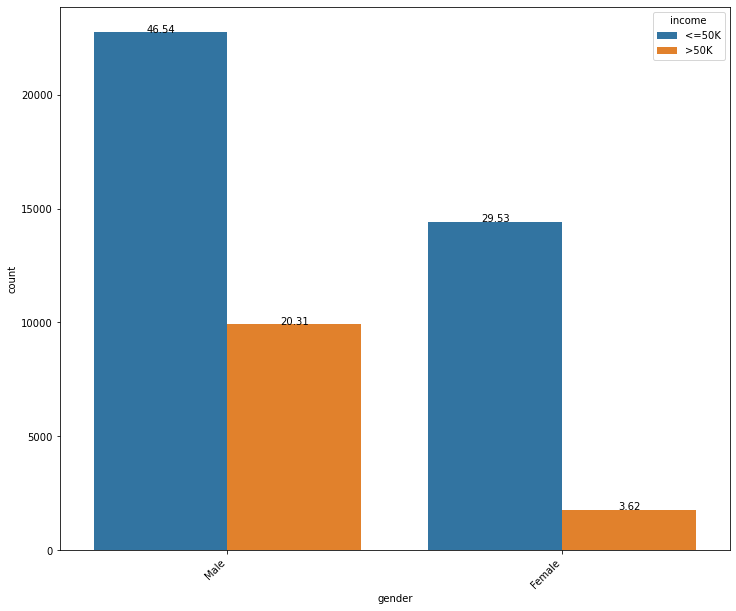

In [39]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="gender", hue="income", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

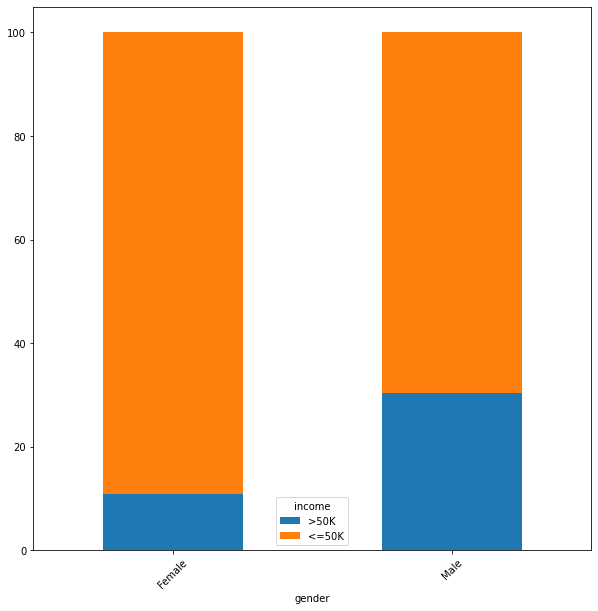

In [40]:
pivot = pd.pivot_table(data, columns='income', index='gender', aggfunc='count', values='idx')
piv = pivot.fillna(0)
piv['total']=piv['<=50K']+piv['>50K']
piv['<=50K'] = piv['<=50K']/piv['total']*100
piv['>50K'] = piv['>50K']/piv['total']*100
piv.drop(['total'],axis=1,inplace=True)
piv = piv[[">50K","<=50K"]] 
_=piv.plot(kind='bar', stacked=True)
_.set_xticklabels(_.get_xticklabels(),rotation=45)
plt.show()

### 4-10) capital-gain
- The average age of people with income higher than 50K (44.28 years old) is greater that that of people with income lower or equal to 50K (36.87 years old).
- Older people tend to make more money.

In [41]:
data['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

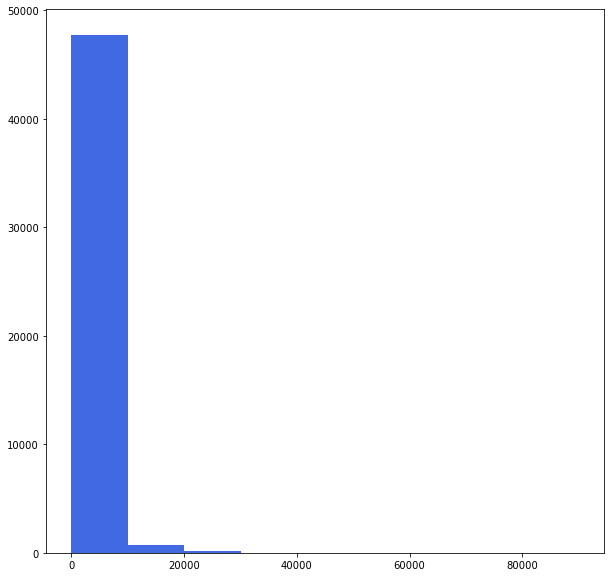

In [42]:
plt.hist(data['capital-gain'], color="#4169E1", bins=np.arange(0,100000,10000));

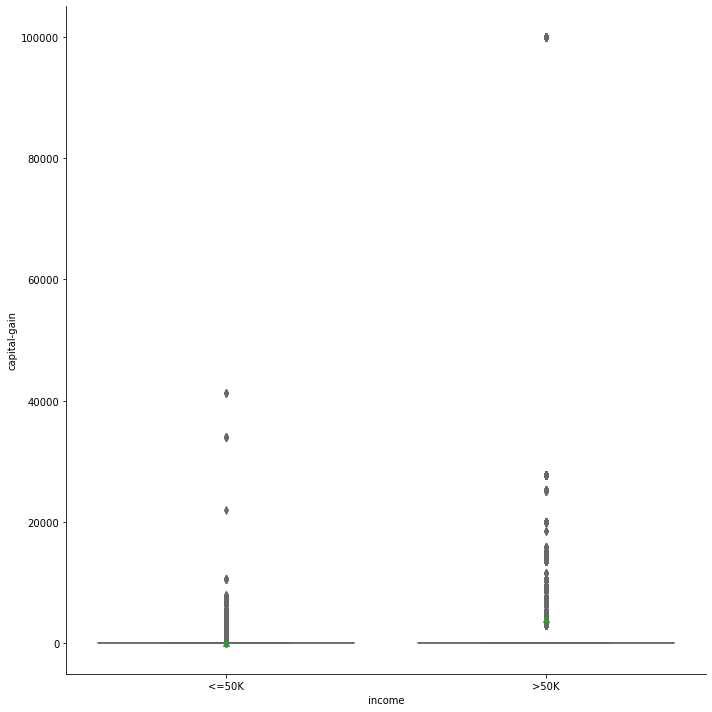

In [43]:
sns.catplot(x="income",y="capital-gain",data=data,  kind="box", height = 10, color="#e5a576", showmeans=True)

In [44]:
data[['income', 'capital-gain']].groupby(['income'], as_index=False).mean().sort_values(by='capital-gain', ascending=False)

,income,capital-gain
1,>50K,4042.239497
0,<=50K,147.010308


### 4-11) capital-loss
- The average age of people with income higher than 50K (44.28 years old) is greater that that of people with income lower or equal to 50K (36.87 years old).
- Older people tend to make more money.

In [45]:
data['capital-loss'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

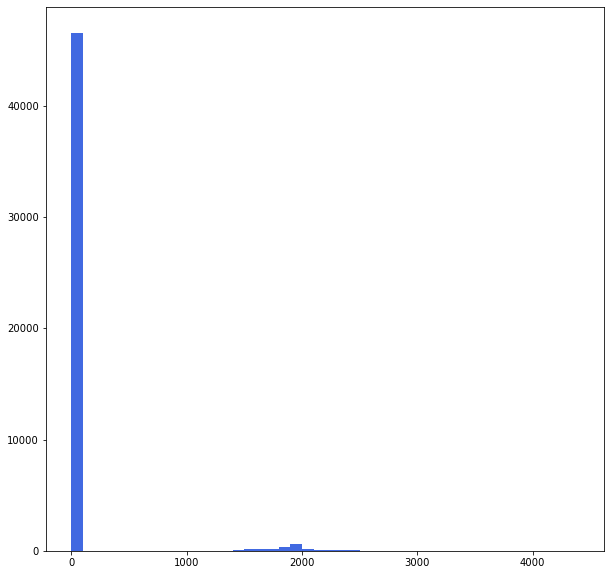

In [46]:
plt.hist(data['capital-loss'], color="#4169E1", bins=np.arange(0,4500,100));

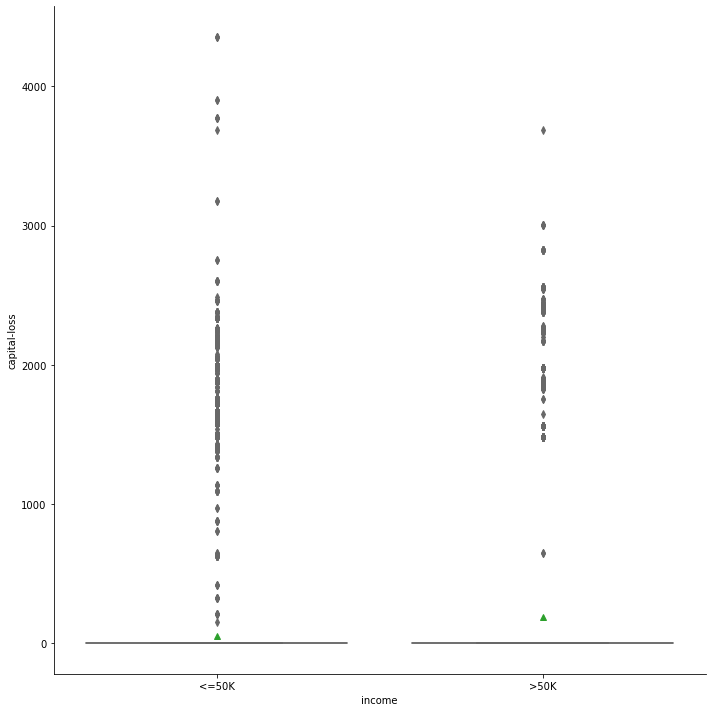

In [47]:
sns.catplot(x="income",y="capital-loss",data=data,  kind="box", height = 10, color="#e5a576", showmeans=True)

In [48]:
data[['income', 'capital-loss']].groupby(['income'], as_index=False).mean().sort_values(by='capital-loss', ascending=False)

,income,capital-loss
1,>50K,193.528964
0,<=50K,54.151931


### 4-12) native-country
- In this data set, most people are from the United States, followed by Mexico.
- Almost 67.85% of the people in the data set are from the US, and make more than 50K.


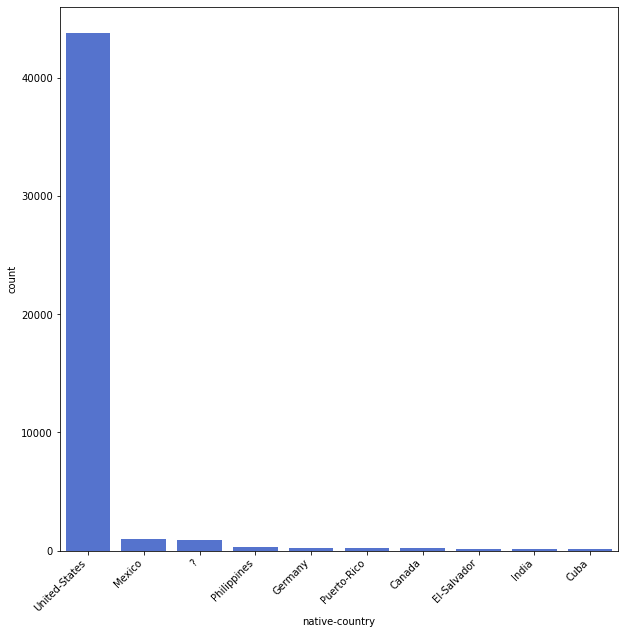

In [49]:
_=sns.countplot(x="native-country",data=data, color = "#4169E1", order = data['native-country'].value_counts()[:10].index);
_.set_xticklabels(_.get_xticklabels(), rotation=45, ha="right");

posx and posy should be finite values
posx and posy should be finite values


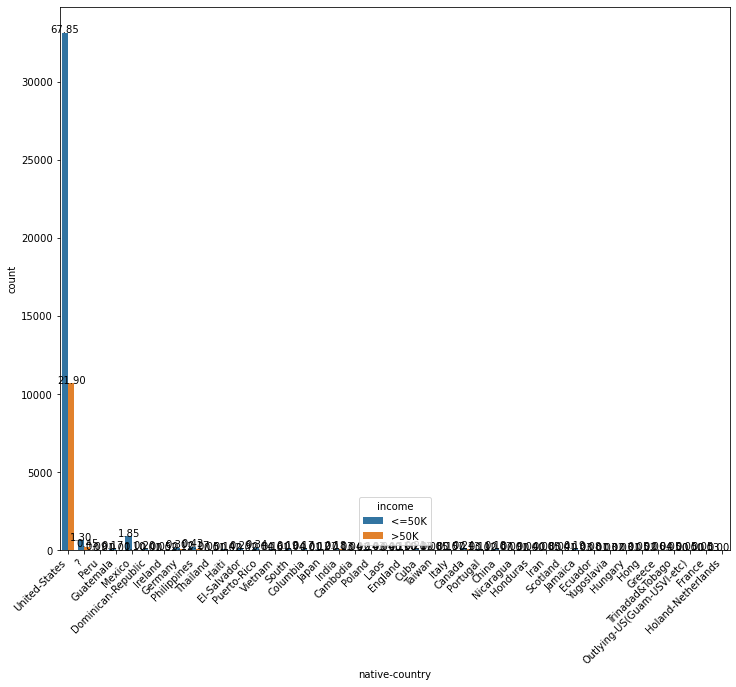

In [50]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="native-country", hue="income", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

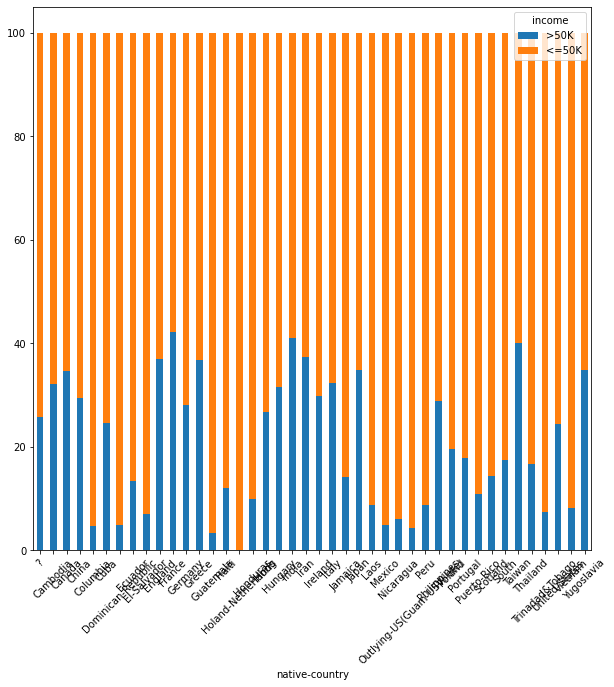

In [51]:
pivot = pd.pivot_table(data, columns='income', index='native-country', aggfunc='count', values='idx')
piv = pivot.fillna(0)
piv['total']=piv['<=50K']+piv['>50K']
piv['<=50K'] = piv['<=50K']/piv['total']*100
piv['>50K'] = piv['>50K']/piv['total']*100
piv.drop(['total'],axis=1,inplace=True)
piv = piv[[">50K","<=50K"]] 
_=piv.plot(kind='bar', stacked=True)
_.set_xticklabels(_.get_xticklabels(),rotation=45)
plt.show()

## 5. Correlation
- There are small correlation between years of education, hours per week, age, capital gain and income. 

In [52]:
data['income'] = data.income.apply(lambda x:0 if x=='<=50K' else 1)

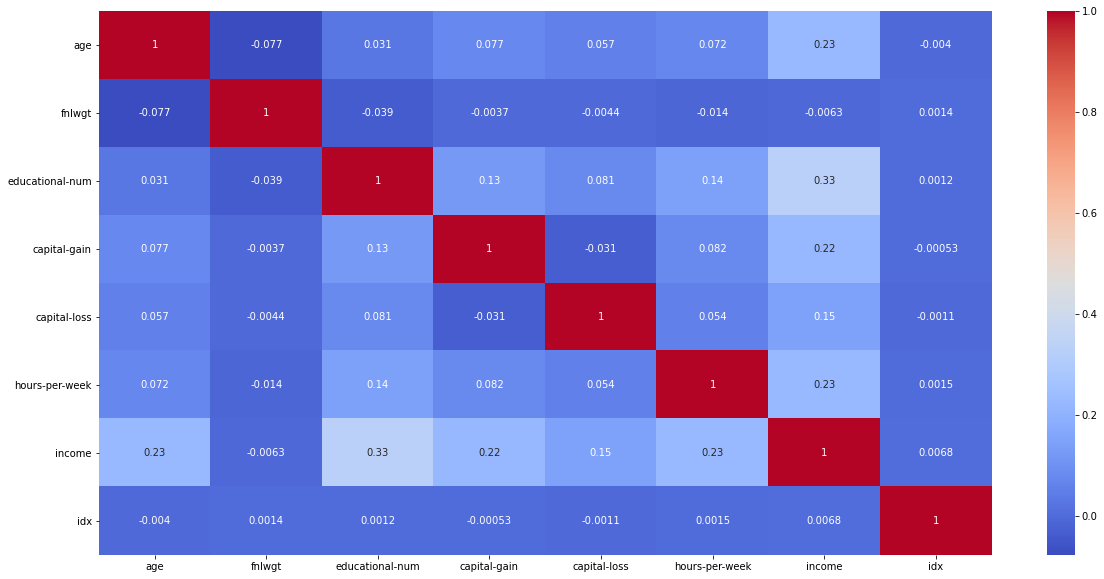

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)